# Boundless GAN for image extension

Paper [Boundless: Generative Adversarial Networks for Image Extension](https://arxiv.org/pdf/1908.07007.pdf)


# Importing the libraries

In [73]:
import tensorflow as tf
import tensorflow_hub as hub
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
print(tf.__version__)
print(hub.__version__)

2.15.0
0.16.1


# Loading the image

In [140]:
image = Image.open('/content/test5.jpeg')

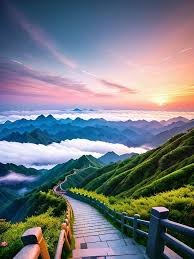

In [141]:
image

In [142]:
image.size

(194, 259)

In [143]:
width, height = image.size
print(width, height)

194 259


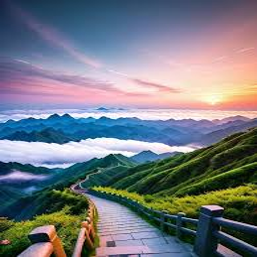

In [144]:
image = image.resize((257, 257))
image

In [145]:
image.size

(257, 257)

In [146]:
type(image)

PIL.Image.Image

In [147]:
image = np.array(image)

In [148]:
type(image)

numpy.ndarray

array([[[24, 33, 66],
        [24, 33, 66],
        [26, 35, 68],
        ...,
        [89, 70, 87],
        [88, 70, 86],
        [88, 70, 86]],

       [[24, 33, 66],
        [24, 33, 66],
        [26, 35, 68],
        ...,
        [90, 71, 88],
        [89, 71, 87],
        [89, 71, 87]],

       [[24, 33, 66],
        [25, 33, 66],
        [25, 35, 68],
        ...,
        [93, 72, 90],
        [93, 72, 89],
        [93, 72, 89]],

       ...,

       [[ 4, 23,  3],
        [ 1, 23,  1],
        [ 0, 19,  0],
        ...,
        [ 7, 26, 38],
        [ 7, 24, 40],
        [ 7, 24, 40]],

       [[ 5, 22,  4],
        [ 2, 20,  3],
        [ 1, 17,  2],
        ...,
        [ 8, 27, 34],
        [ 8, 24, 36],
        [ 8, 24, 37]],

       [[ 4, 21,  3],
        [ 2, 19,  2],
        [ 0, 16,  1],
        ...,
        [ 8, 26, 34],
        [ 8, 24, 36],
        [ 8, 24, 37]]], dtype=uint8)
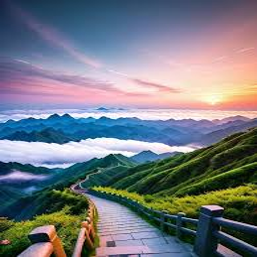

In [149]:
image

In [150]:
image.shape

(257, 257, 3)

In [151]:
image = np.expand_dims(image.astype(np.float32) / 255., axis = 0)

In [152]:
image.shape

(1, 257, 257, 3)

In [153]:
image

array([[[[0.09411765, 0.12941177, 0.25882354],
         [0.09411765, 0.12941177, 0.25882354],
         [0.10196079, 0.13725491, 0.26666668],
         ...,
         [0.34901962, 0.27450982, 0.34117648],
         [0.34509805, 0.27450982, 0.3372549 ],
         [0.34509805, 0.27450982, 0.3372549 ]],

        [[0.09411765, 0.12941177, 0.25882354],
         [0.09411765, 0.12941177, 0.25882354],
         [0.10196079, 0.13725491, 0.26666668],
         ...,
         [0.3529412 , 0.2784314 , 0.34509805],
         [0.34901962, 0.2784314 , 0.34117648],
         [0.34901962, 0.2784314 , 0.34117648]],

        [[0.09411765, 0.12941177, 0.25882354],
         [0.09803922, 0.12941177, 0.25882354],
         [0.09803922, 0.13725491, 0.26666668],
         ...,
         [0.3647059 , 0.28235295, 0.3529412 ],
         [0.3647059 , 0.28235295, 0.34901962],
         [0.3647059 , 0.28235295, 0.34901962]],

        ...,

        [[0.01568628, 0.09019608, 0.01176471],
         [0.00392157, 0.09019608, 0.00392157]

# Executing the GAN

In [154]:
models_links = {
    'Boundless Half' : 'https://tfhub.dev/google/boundless/half/1',
    'Boundless Quarter' : 'https://tfhub.dev/google/boundless/quarter/1',
    'Boundless Three Quarters' : 'https://tfhub.dev/google/boundless/three_quarter/1'
}

In [155]:
model_name = 'Boundless Quarter' # @param ['Boundless Half', 'Boundless Quarter', 'Boundless Three Quarters']

In [156]:
model_path = models_links[model_name]

In [157]:
model = hub.load(model_path)

In [158]:
result = model.signatures['default'](tf.constant(image))

In [159]:
result

{'default': <tf.Tensor: shape=(1, 257, 257, 3), dtype=float32, numpy=
 array([[[[0.11199909, 0.13585404, 0.25862324],
          [0.09309497, 0.13310617, 0.267055  ],
          [0.10679039, 0.1466873 , 0.2781038 ],
          ...,
          [0.2728954 , 0.22072142, 0.29778975],
          [0.28643057, 0.23761448, 0.31582275],
          [0.2677145 , 0.23376763, 0.31352106]],
 
         [[0.09193155, 0.13328055, 0.26786786],
          [0.09308466, 0.11889869, 0.24920544],
          [0.09565592, 0.13598573, 0.26028594],
          ...,
          [0.2444638 , 0.2234805 , 0.30610275],
          [0.2691439 , 0.23578057, 0.3209859 ],
          [0.24994028, 0.20498386, 0.3003756 ]],
 
         [[0.09444904, 0.12952214, 0.26046944],
          [0.09875098, 0.12367472, 0.2552659 ],
          [0.10412249, 0.13775888, 0.26625988],
          ...,
          [0.2645683 , 0.23846343, 0.3182122 ],
          [0.2877371 , 0.25666276, 0.33840936],
          [0.25208294, 0.22234496, 0.31567928]],
 
         ...

## Visualizing the results

In [160]:
generated_image = result['default']
masked_image = result['masked_image']

In [161]:
generated_image.shape, np.squeeze(generated_image).shape

(TensorShape([1, 257, 257, 3]), (257, 257, 3))

In [162]:
def visualize_results(original_image, masked_image, generated_image):
  imgs = [original_image, masked_image, generated_image]
  title = ['Original image', 'Masked image', 'Generated image']
  plt.figure(figsize = (24,12))
  for i, img in enumerate(imgs):
    plt.subplot(1, 3, i + 1)
    plt.imshow((np.squeeze(img)))
    plt.title(title[i])
    plt.axis('off')
  plt.show()

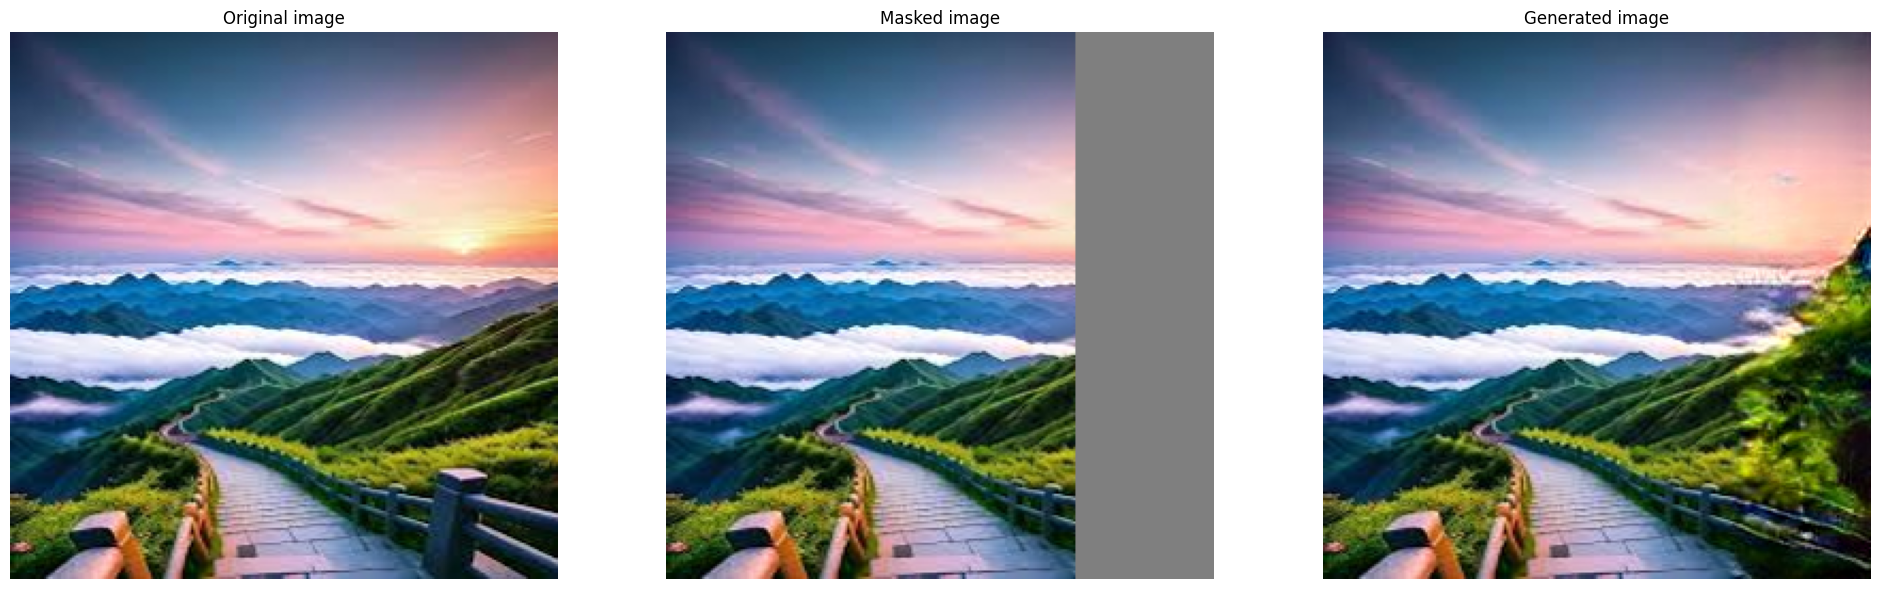

In [163]:
visualize_results(image, masked_image, generated_image)

---

Based on: https://www.tensorflow.org/hub/tutorials/boundless